In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns


In [2]:
# load data from csv

data_directory = 'data/'

q2_township_csv = data_directory + 'q2_townships.csv'
q2_transaction_csv = data_directory + 'q2_transactions.csv'
q2_poi_csv = data_directory + 'q2_pois.csv'

township_csv = data_directory + 'q3_townships.csv'
transaction_csv = data_directory + 'q3_transactions.csv'
poi_csv = data_directory + 'q3_pois.csv'

townships = pd.read_csv(q2_township_csv, na_values=['None'], index_col=0)
transactions = pd.read_csv(q2_transaction_csv, na_values=['None'], index_col=0)
pois = pd.read_csv(q2_poi_csv, na_values=['None'], index_col=0)


### Few data to clean:
#### TOWNSHIP:
#### - drop area = None
#### - drop latitude or longitude = None or 0

#### POI:
#### - drop duplicate rows

#### TRANSACTION:
#### - drop planned_region = None
#### - drop tenure column
#### - replace bedrooms None with 0


## Township

In [3]:
townships.head()

,project_id,latitude,longitude,project_name,state,area,street_name,median_psf,median_price
0,10113,3.200030,101.642998,Kepong Baru,Kuala Lumpur,Kepong,JALAN HELANG,388,775000
1,16814,3.087248,101.721283,Bandar Tun Razak (Kampung Konggo),Kuala Lumpur,Bandar Tun Razak,JALAN JUJUR 3,294,396667
2,16319,3.181050,101.672996,Sri Putramas I,Kuala Lumpur,Dutamas,JALAN PUTRAMAS 1,394,432667
3,17003,3.149142,101.624763,Taman Tun Dr Ismail (TTDI),Kuala Lumpur,Taman Tun Dr Ismail,LENGKOK AMINUDDIN BAKI,814,1541667
4,25133,3.192106,101.639056,Bandar Menjalara (Desa Seri Mahkota),Kuala Lumpur,Bandar Menjalara,JALAN 6/62,512,635000


In [4]:
townships.shape

(132, 9)

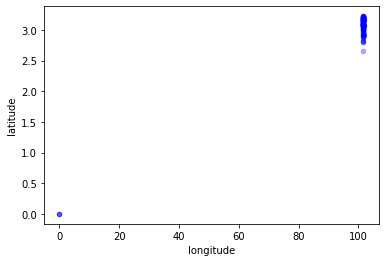

In [5]:
# scatter plot of longitude and latitude data visualized geographical distribution.
# null values as well as extreme values which are far from the targetted geographical area 
# needs to be corrected or cleaned

townships[['latitude', 'longitude']].dropna().astype(float).plot.scatter(
    x = 'longitude', y = 'latitude', c = 'Blue', alpha = 0.3
)

In [6]:
townships[
    (townships['latitude'].isnull()) |
    (townships['latitude'] == 0) |
    (townships['longitude'].isnull()) |
    (townships['longitude'] == 0)
]

,project_id,latitude,longitude,project_name,state,area,street_name,median_psf,median_price
6,29292,NaN,NaN,DESA PARK CITY (SOUTH LAKE),Kuala Lumpur,NaN,JALAN DENAI SELATAN,1124,1850000
29,26244,NaN,NaN,Jalan Sri Hartamas,Kuala Lumpur,NaN,JALAN SRI HARTAMAS,824,550000
30,26245,NaN,NaN,Jalan Stonor,Kuala Lumpur,NaN,JALAN STONOR,789,2650000
78,28340,0.0,0.0,Serenia City,Selangor,Dengkil,JALAN AMAN SERENIA 7/10 BANDAR SERENIA,388,624088
86,28531,0.0,0.0,Taman Sri Pelangi,Selangor,NaN,JALAN SUNGAI RABA,285,438800
104,8643,0.0,0.0,Pangsapuri PKNS SS3,Selangor,Kelana Jaya,JALAN SS 3/39,216,130000


In [7]:
# rows with missing area are subsets of rows with missing GPS coordination
townships[pd.isna(townships['area'])]

,project_id,latitude,longitude,project_name,state,area,street_name,median_psf,median_price
6,29292,NaN,NaN,DESA PARK CITY (SOUTH LAKE),Kuala Lumpur,NaN,JALAN DENAI SELATAN,1124,1850000
29,26244,NaN,NaN,Jalan Sri Hartamas,Kuala Lumpur,NaN,JALAN SRI HARTAMAS,824,550000
30,26245,NaN,NaN,Jalan Stonor,Kuala Lumpur,NaN,JALAN STONOR,789,2650000
86,28531,0.0,0.0,Taman Sri Pelangi,Selangor,NaN,JALAN SUNGAI RABA,285,438800


In [8]:
# For latitude and longitude, fill 0 with NaN, then drop NaN
townships[['latitude', 'longitude']] = townships[['latitude', 'longitude']].replace(['0', 0], np.nan)
townships.dropna(subset=['latitude', 'longitude'], how='any', inplace=True)
townships.shape

(126, 9)

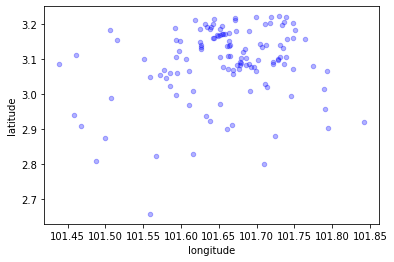

In [9]:
# Plot after droping NaN and 0

townships[['latitude', 'longitude']].plot.scatter(
    x = 'longitude', y = 'latitude', c = 'Blue', alpha = 0.3
)

In [10]:
## Skip droping area = None because these rows are the same with Latitude or Longitude = NaN or 0
townships['area'].isnull().sum()

0

In [11]:
townships.head()

,project_id,latitude,longitude,project_name,state,area,street_name,median_psf,median_price
0,10113,3.200030,101.642998,Kepong Baru,Kuala Lumpur,Kepong,JALAN HELANG,388,775000
1,16814,3.087248,101.721283,Bandar Tun Razak (Kampung Konggo),Kuala Lumpur,Bandar Tun Razak,JALAN JUJUR 3,294,396667
2,16319,3.181050,101.672996,Sri Putramas I,Kuala Lumpur,Dutamas,JALAN PUTRAMAS 1,394,432667
3,17003,3.149142,101.624763,Taman Tun Dr Ismail (TTDI),Kuala Lumpur,Taman Tun Dr Ismail,LENGKOK AMINUDDIN BAKI,814,1541667
4,25133,3.192106,101.639056,Bandar Menjalara (Desa Seri Mahkota),Kuala Lumpur,Bandar Menjalara,JALAN 6/62,512,635000


In [12]:
townships.shape

(126, 9)

In [13]:
townships.to_csv(township_csv)

## POI

In [14]:
pois.head()

,name,category,latitude,longitude
0,Sekolah Menengah Kebangsaan Kepong Baru,education,3.197770,101.647000
1,Sekolah Kebangsaan Taman Kepong,education,3.198950,101.648000
2,Sekolah Kebangsaan Kepong Baru,education,3.205899,101.645528
3,Sekolah Kebangsaan Menjalara,education,3.193969,101.637578
4,Sekolah Menengah Kebangsaan Taman Bukit Maluri,education,3.202450,101.634000


In [15]:
pois.shape

(5442, 4)

In [16]:
pois.drop_duplicates(inplace = True)
pois.shape

(1255, 4)

In [17]:
pois.to_csv(poi_csv)

## Transactions

In [18]:
transactions.head()

,project_id,date,property_type,tenure,area_sqft,non_landed,bedrooms,street_name,psf,price,planning_region
0,10113,1576454400,Terrace House,Leasehold,1970,0,3.0,JALAN HELANG,310,610000,Kepong
1,10113,1576195200,Terrace House,Leasehold,1539,0,3.0,LORONG LANG HITAM 6,468,720000,Kepong
2,10113,1576108800,Terrace House,Leasehold,1539,0,3.0,JALAN LANG KEPALA PUTIH,435,670000,Kepong
3,10113,1575936000,Terrace House,Leasehold,3272,0,3.0,JALAN CHIAK RAYA,336,1100000,Kepong
4,16814,1575936000,Cluster House,Leasehold,990,0,2.0,JALAN JUJUR 3,283,280000,Bandar Tun Razak


In [19]:
transactions.shape

(166, 11)

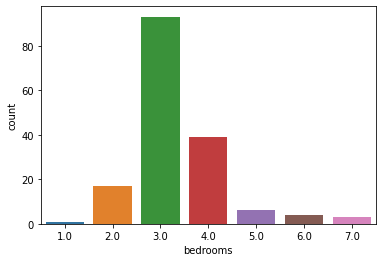

In [20]:
sns.countplot(transactions['bedrooms'])

In [21]:
# replace NaN with 0 for bedrooms
transactions = transactions.fillna(value = {'bedrooms': 0})

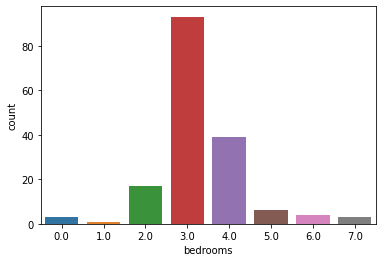

In [22]:
sns.countplot(transactions['bedrooms'])

In [23]:
transactions[pd.isna(transactions['planning_region'])]

,project_id,date,property_type,tenure,area_sqft,non_landed,bedrooms,street_name,psf,price,planning_region
17,29292,1577664000,Terrace House,Leasehold,1647,0,4.0,JALAN DENAI SELATAN,1154,1900000,NaN
18,29292,1576022400,Terrace House,Leasehold,1647,0,4.0,JALAN DENAI SELATAN,1093,1800000,NaN
46,26244,1577318400,Hotel/Service Apartment,Leasehold,667,1,0.0,JALAN SRI HARTAMAS,824,550000,NaN
47,26245,1575417600,Condominium/Apartment,Leasehold,3358,1,6.0,JALAN STONOR,789,2650000,NaN
121,28531,1575417600,Terrace House,Leasehold,1539,0,4.0,JALAN SUNGAI RABA,285,438800,NaN
122,28531,1575417600,Terrace House,Leasehold,1539,0,4.0,JALAN SUNGAI RABA,285,438800,NaN


In [24]:
# Missing planning_region cannot be looked up from township
# Because they belong to the same projects as those twonship with missing area, 
# Drop rows with the missing value 
townships[townships['project_id'].isin([29292, 26244, 26245, 28531])]

,project_id,latitude,longitude,project_name,state,area,street_name,median_psf,median_price


In [25]:
transactions.dropna(subset=['planning_region'], inplace = True)

In [26]:
transactions.drop(['tenure'], axis=1, inplace=True)

In [27]:
transactions.head()

,project_id,date,property_type,area_sqft,non_landed,bedrooms,street_name,psf,price,planning_region
0,10113,1576454400,Terrace House,1970,0,3.0,JALAN HELANG,310,610000,Kepong
1,10113,1576195200,Terrace House,1539,0,3.0,LORONG LANG HITAM 6,468,720000,Kepong
2,10113,1576108800,Terrace House,1539,0,3.0,JALAN LANG KEPALA PUTIH,435,670000,Kepong
3,10113,1575936000,Terrace House,3272,0,3.0,JALAN CHIAK RAYA,336,1100000,Kepong
4,16814,1575936000,Cluster House,990,0,2.0,JALAN JUJUR 3,283,280000,Bandar Tun Razak


In [28]:
transactions.shape

(160, 10)

In [29]:
transactions.to_csv(transaction_csv)